In [1]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from datetime import date, datetime, timedelta

In [2]:
path_earning_call_analysts_question=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_analysts_question_sentiment.csv'
path_crsp=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/crspmonthfromwrdsfilters.csv'

In [3]:
data_call_analyst_question_all=pd.read_csv(path_earning_call_analysts_question)
data_call_analyst_question_all['call_datetime']=\
pd.to_datetime(data_call_analyst_question_all['call_datetime'], format='%Y-%m-%d')
data_call_analyst_question_all=data_call_analyst_question_all.sort_values('call_datetime')

In [5]:
data_call_analyst_question_all['call_datetime'].min(),\
data_call_analyst_question_all['call_datetime'].max()

(Timestamp('2010-11-09 00:00:00'), Timestamp('2023-10-18 00:00:00'))

In [6]:
data_call_analyst_question_all=\
data_call_analyst_question_all[(data_call_analyst_question_all['call_datetime'] >= datetime(2010, 11, 9))&\
                           (data_call_analyst_question_all['call_datetime'] <= datetime(2023, 2, 28))].reset_index(drop=True)

In [18]:
data_call_analyst_question_all.columns

Index(['time', 'call_datetime', 'call_year', 'call_month', 'call_day',
       'company_name', 'company', 'quarter', 'year_quarter',
       'analysts_question', 'analyst_text', 'analyst_text_removestopwords',
       'analyst_neg', 'analyst_pos', 'analyst_neu'],
      dtype='object')

In [8]:
crsp=pd.read_csv(path_crsp, low_memory=False)
crsp_tesla=crsp[crsp['permno_crspmonth']==93436]
crsp_tesla['date_crspmonth']=\
pd.to_datetime(crsp_tesla['date_crspmonth'], format='%Y-%m-%d')
crsp_tesla=crsp_tesla.sort_values('date_crspmonth')
crsp_tesla=crsp_tesla.reset_index(drop=True)

/var/folders/6l/2d59bcb16yjbzzkcgz02zhn00000gn/T/ipykernel_93545/3394296330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crsp_tesla['date_crspmonth']=\


In [9]:
crsp_tesla['date_crspmonth'].min(), crsp_tesla['date_crspmonth'].max()

(Timestamp('2010-06-30 00:00:00'), Timestamp('2022-12-30 00:00:00'))

In [10]:
crsp_tesla.head()

,permno_crspmonth,date_crspmonth,shrcd_crspmonth,ncusip_crspmonth,ticker_crspmonth,COMNAM,permco_crspmonth,hexcd_crspmonth,cusip_crspmonth,prc_crspmonth,vol_crspmonth,ret_crspmonth,dlret_crspmonth,bid_crspmonth,ask_crspmonth,shrout_crspmonth
0,93436,2010-06-30,11.0,88160R10,TSLA,TESLA MOTORS INC,53453,3,88160R10,23.830,366953.0,NaN,NaN,23.61,23.75,93198.0
1,93436,2010-07-30,11.0,88160R10,TSLA,TESLA MOTORS INC,53453,3,88160R10,19.940,657886.0,-0.16324,NaN,19.87,19.90,93198.0
2,93436,2010-08-31,11.0,88160R10,TSLA,TESLA MOTORS INC,53453,3,88160R10,19.480,153193.0,-0.023069,NaN,19.56,19.64,93198.0
3,93436,2010-09-30,11.0,88160R10,TSLA,TESLA MOTORS INC,53453,3,88160R10,20.405,183742.0,0.047485,NaN,20.38,20.43,93253.0
4,93436,2010-10-29,11.0,88160R10,TSLA,TESLA MOTORS INC,53453,3,88160R10,21.840,67145.0,0.070326,NaN,21.83,21.84,93271.0


In [11]:
crsp_tesla=\
crsp_tesla[(crsp_tesla['date_crspmonth'] >= datetime(2010, 11, 9))&\
           (crsp_tesla['date_crspmonth'] <= datetime(2023, 2, 28))].reset_index(drop=True)

In [12]:
crsp_tesla.columns

Index(['permno_crspmonth', 'date_crspmonth', 'shrcd_crspmonth',
       'ncusip_crspmonth', 'ticker_crspmonth', 'COMNAM', 'permco_crspmonth',
       'hexcd_crspmonth', 'cusip_crspmonth', 'prc_crspmonth', 'vol_crspmonth',
       'ret_crspmonth', 'dlret_crspmonth', 'bid_crspmonth', 'ask_crspmonth',
       'shrout_crspmonth'],
      dtype='object')

In [13]:
crsp_tesla['spread_crspmonth']=\
(crsp_tesla['ask_crspmonth']-crsp_tesla['bid_crspmonth'])/crsp_tesla['prc_crspmonth']

In [14]:
crsp_tesla.columns

Index(['permno_crspmonth', 'date_crspmonth', 'shrcd_crspmonth',
       'ncusip_crspmonth', 'ticker_crspmonth', 'COMNAM', 'permco_crspmonth',
       'hexcd_crspmonth', 'cusip_crspmonth', 'prc_crspmonth', 'vol_crspmonth',
       'ret_crspmonth', 'dlret_crspmonth', 'bid_crspmonth', 'ask_crspmonth',
       'shrout_crspmonth', 'spread_crspmonth'],
      dtype='object')

In [15]:
crsp_tesla['prc_crspmonth'].mean(),\
crsp_tesla['ret_crspmonth'].apply(lambda x: float(x)).mean(),\
crsp_tesla['ret_crspmonth'].apply(lambda x: float(x)).std(),\
crsp_tesla['bid_crspmonth'].mean(),\
crsp_tesla['ask_crspmonth'].mean(),\
crsp_tesla['spread_crspmonth'].mean()

(317.6818516438356,
 0.045816410958904104,
 0.18647723214271833,
 317.58561712328765,
 317.7008892465753,
 0.000422681127178902)

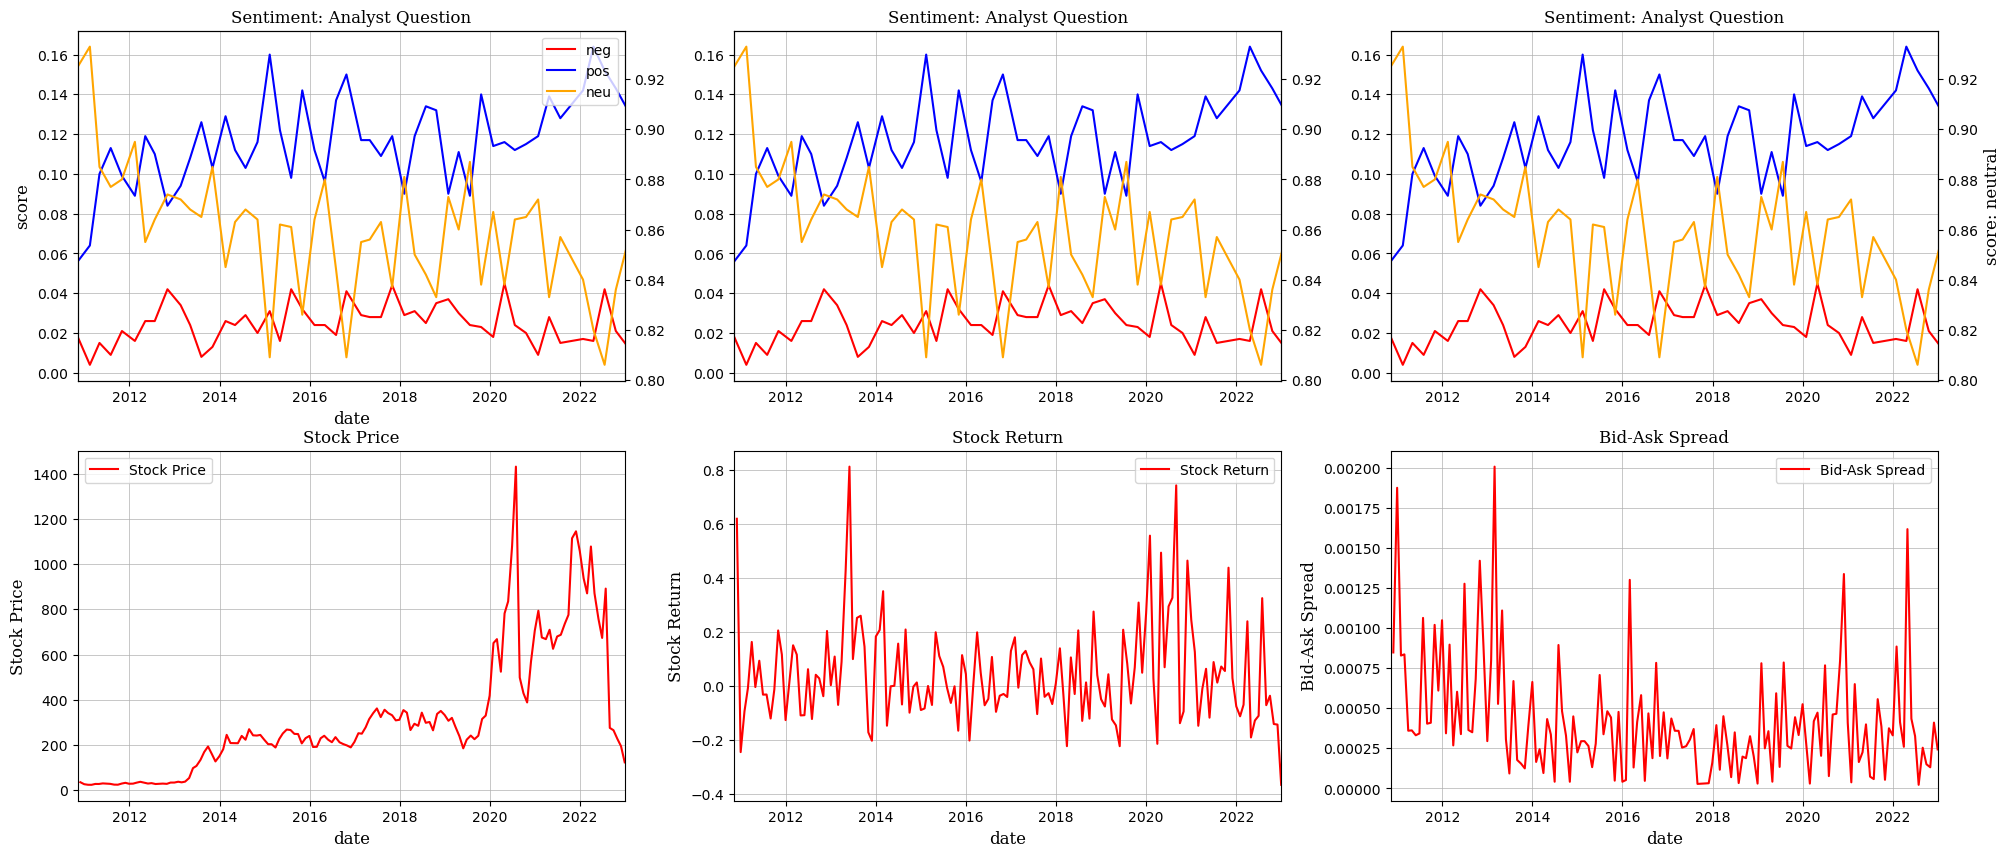

In [20]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([[ax1, ax2, ax3], [ax4, ax5, ax6]]) =\
plt.subplots(nrows = 2, ncols = 3, figsize = (24, 10))

lns1=\
ax1.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_pos'], label='pos', color='b')

ax1.set_title("Sentiment: Analyst Question", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_analyst_question_all['call_datetime'],\
               data_call_analyst_question_all['analyst_neu'], label='neu', color='orange')
# ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax4.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['prc_crspmonth'], label='Stock Price', color='r')

ax4.set_title("Stock Price", **csfont, size = sizetext)
ax4.set_ylabel('Stock Price', size = sizetext, **csfont)
ax4.set_xlabel('date', size = sizetext, **csfont)
ax4.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax4.grid(linewidth=0.5)
ax4.legend()



lns1=\
ax2.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_neg'], color='r')
lns2=\
ax2.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_pos'], color='b')

ax2.set_title("Sentiment: Analyst Question", **csfont, size = sizetext)
# ax2.set_ylabel('score', size = sizetext, **csfont)
# ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax2.grid(linewidth=0.5)
# ax2.legend()

ax22 = ax2.twinx()
lns3=ax22.plot(data_call_analyst_question_all['call_datetime'],\
               data_call_analyst_question_all['analyst_neu'], color='orange')
# ax22.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
# ax22.legend(lns, labs, loc=1)

ax5.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['ret_crspmonth'].apply(lambda x: float(x)),
         label='Stock Return', color='r')

ax5.set_title("Stock Return", **csfont, size = sizetext)
ax5.set_ylabel('Stock Return', size = sizetext, **csfont)
ax5.set_xlabel('date', size = sizetext, **csfont)
ax5.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)])
ax5.grid(linewidth=0.5)
ax5.legend()


lns1=\
ax3.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_neg'], color='r')
lns2=\
ax3.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_pos'], color='b')

ax3.set_title("Sentiment: Analyst Question", **csfont, size = sizetext)
# ax2.set_ylabel('score', size = sizetext, **csfont)
# ax2.set_xlabel('date', size = sizetext, **csfont)
ax3.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax3.grid(linewidth=0.5)
# ax2.legend()

ax33 = ax3.twinx()
lns3=ax33.plot(data_call_analyst_question_all['call_datetime'],\
               data_call_analyst_question_all['analyst_neu'], color='orange')
ax33.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]


ax6.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['spread_crspmonth'], label='Bid-Ask Spread', color='r')

ax6.set_title("Bid-Ask Spread", **csfont, size = sizetext)
ax6.set_ylabel('Bid-Ask Spread', size = sizetext, **csfont)
ax6.set_xlabel('date', size = sizetext, **csfont)
ax6.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax6.grid(linewidth=0.5)
ax6.legend()